In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# matplotlib 의 기본 scheme 말고 
# seaborn scheme 을 세팅하여, 일일이 graph의 font size 지정할 필요 없이 
# seaborn 의 font_scale 을 사용하는 것을 추천드립니다.
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,2.0,-26.0,2.0


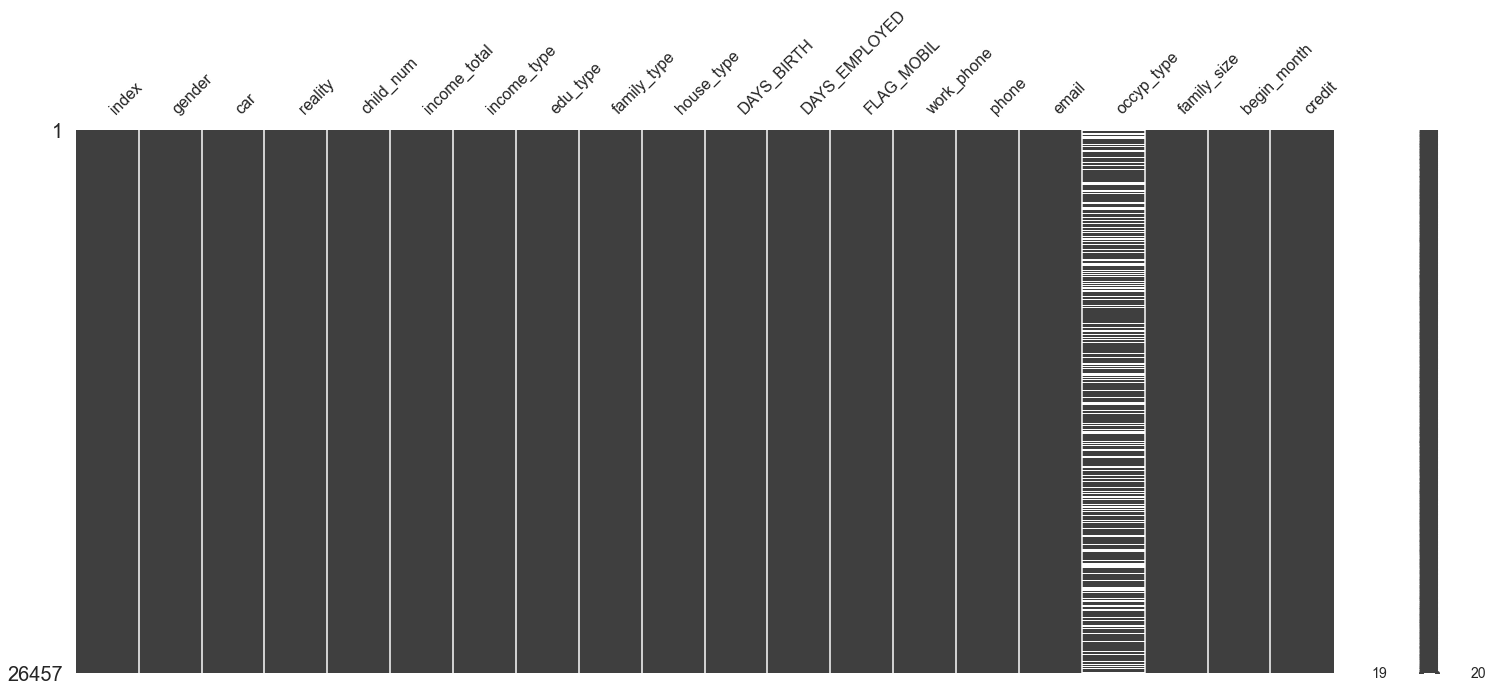

In [4]:
# null dataset 확인
msno.matrix(df=df_train)

# 직업유형, 휴대폰 소지여부 삭제
df_train.drop('FLAG_MOBIL', axis=1, inplace=True)
df_train.drop('occyp_type', axis=1, inplace=True)

df_test.drop('FLAG_MOBIL', axis=1, inplace=True)
df_test.drop('occyp_type', axis=1, inplace=True)

df_train.head()

In [5]:
# 범주형 데이터 정규화
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_column_train = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'credit']
for i in categorical_column_train:
    df_train[i] = encoder.fit_transform(df_train[i])

categorical_column_test = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type']
for i in categorical_column_test:
    df_test[i] = encoder.fit_transform(df_test[i])

In [6]:
# 표준화(연속형 데이터 정규화)
from sklearn.preprocessing import StandardScaler
train_x = df_train.drop('credit', axis=1).values # 독립변인들의 value값만 추출
features = df_train.drop('credit', axis=1).columns
train_y = df_train['credit'].values # 종속변인 추출

train_x = StandardScaler().fit_transform(train_x)

pd.DataFrame(train_x, columns=features).head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,-1.731985,-0.703562,-0.782463,-1.437626,-0.573599,0.149136,-1.379572,-1.563528,-0.385583,0.762704,0.490075,-0.463930,-0.538417,-0.645705,-0.316937,-0.214735,1.215231
1,-1.731854,-0.703562,-0.782463,0.695591,0.764529,0.590848,-1.379572,0.672647,-1.435432,-0.296331,1.089621,-0.440878,-0.538417,-0.645705,3.155199,0.876135,1.275620
2,-1.731723,1.421339,1.278015,0.695591,-0.573599,2.578550,0.924752,-1.563528,-0.385583,-0.296331,-0.744719,-0.461929,-0.538417,1.548696,-0.316937,-0.214735,0.249003
3,-1.731593,-0.703562,-0.782463,0.695591,-0.573599,0.149136,-1.379572,0.672647,-0.385583,-0.296331,0.207081,-0.444893,-0.538417,1.548696,-0.316937,-0.214735,-0.656836
4,-1.731462,-0.703562,1.278015,0.695591,-0.573599,-0.292575,-0.227410,-1.563528,-0.385583,-0.296331,0.219220,-0.444988,-0.538417,-0.645705,-0.316937,-0.214735,0.007446
